# Tutorial 5 - Fluids in the Complex Plane

This tutorial will cover complex numbers and the compelx plane, and how we can use that as a tool to develop fluid dynamics.

## Complex Numbers

A complex number is written as
$$
z = x + iy,
$$
where $x$ is called the real part and $y$ the imaginary part.  Complex numbers are built into Python, so they're straightforward to use:

In [6]:
z1 = 2 + 3j
print(z1)

(2+3j)


Notice that the imaginary number $i$ is called "$j$" in Python -- $i$ is too often used in loops, and $j$ is pretty typical in some engineering fields.  

You can add and multiply complex numbers as usual:

In [7]:
z2 = -2 + 1j

print(z1 + z2)
print(z1 * z2)

4j
(-7-4j)


You can also extract just the real or imaginary part, and take the complex conjugate:

In [8]:
print(z1.real)
print(z2.imag)
print(z1.conjugate())

2.0
1.0
(2-3j)


Using polar coordinates can sometimes be more convenient.  In polars, the complex number is written
$$
z = s\, e^{i\phi},
$$
where $s$ is the distance from the origin to the point, and $\phi$ is the angle measured from the real axis (the $x$ axis).  The distance $s$ is called the modulus, and $\phi$ the argument (or sometimes phase).  We can calculate them as follows:
$$
s = |z| = z^* z,
$$
where the star $^*$ indicates the complex conjugate, and
$$
\phi = \tan^{-1}(y/x).
$$
Python has functions that do the work for us:

In [46]:
from cmath import phase, polar, sqrt

s1 = abs(z1)
phi1 = phase(z1)
print(s1, phi1)

# or
print(polar(z1))
print(polar(z2))

3.605551275463989 0.982793723247329
(3.605551275463989, 0.982793723247329)
(2.23606797749979, 2.677945044588987)


## The Complex Plane

Now that we have the basics covered, let's draw the complex plane and plot our two complex numbers.  The $x$ axis becomes the real axis, and the $y$ axis the imaginary.

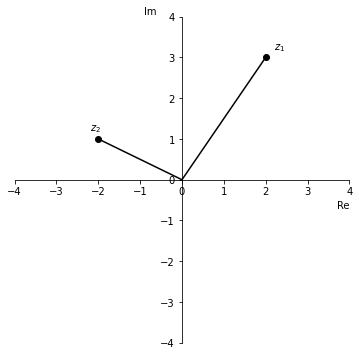

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel("Re", loc="right")
ax.set_ylabel("Im", loc="top", rotation='horizontal')

plt.plot(z1.real, z1.imag, "o", color="black")
plt.plot([0, z1.real], [0, z1.imag], color="black")
plt.text(z1.real + 0.2 , z1.imag + 0.2, "$z_1$")

plt.plot(z2.real, z2.imag, "o", color="black")
plt.plot([0, z2.real], [0, z2.imag], color="black")
plt.text(z2.real - 0.2 , z2.imag + 0.2, "$z_2$")

plt.show()

It's easy to draw shapes in the complex plane as well.  For example, the equation of a circle of radius $a$ centred at point $z_0$ is given by
$$
z = z_0 + a\, e^{i\phi}.
$$
Here's how we can draw that circle:

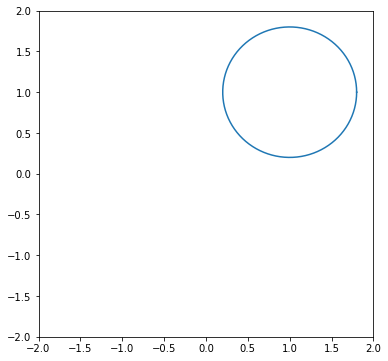

In [57]:
import numpy as np

def circle(radius = 1.0, centre = 0.0):
    # set up an array of angles between 0 and 2pi; we'll return a complex array
    # of points along the circle at those angles.
    angles = np.linspace(0, 2*np.pi, 100)
    circ = centre + radius * np.exp(1j*angles)
    return circ

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

circ = circle(radius = 0.8, centre = 1+1j)
ax.plot(circ.real, circ.imag)

## The Complex Potential

In fluid dynamics, we define a function called the complex potential, 
$$
w(z) = \varphi + i \psi,
$$
where $\varphi(x, y)$ is the velocity potential, and $\psi(x, y)$ is the stream function.  Given the complex potential, we can easily find the stream function in Python by taking the imaginary part of $w$.

With the stream function, we can plot streamlines using a meshgrid as we did in Tutorial 2.  For example, consider the compelx potential
$$
w(z) = \frac{1}{2} \alpha z^2 - \frac{i\Gamma}{2\pi} \log(z - 1).
$$
Here's how we plot the streamlines for this.

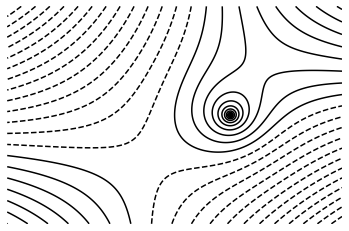

In [63]:
def w(z):
    U = 1.0
    a = 1.0
    Gamma = 10.0
    alpha = 0.0

    return 0.5 * 1.0 * z**2 - 1j * Gamma / 2.0 / np.pi * np.log(z - 1)

# set up the meshgrid as usual
xx = np.linspace(-3.0, 3.0, 1000)
yy = np.linspace(-2.0, 2.0, 1000)
xx, yy = np.meshgrid(xx, yy)
# but now we'll also create one that is complex:
zz = xx + 1j*yy

# The stream function is
psi = w(zz).imag

# Plot it!
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.contour(xx, yy, psi, colors='black', levels=30)

## Conformal Mapping

Conformal mapping transforms the complex plane (keeping local angles the same).  In fluid dynamics, a common mapping is the Joulowski transformation,
$$
Z = f(z) = z + \frac{c^2}{z},
$$
where $c$ is a parameter.  The Joukowski transformation takes a circle centered at the origin in the $z$ plane to an ellipse in the $Z$ plane.  We can do this easily in Python by transforming the coordinates of the points in the circle from above.

Interestingly, the same transformation takes a circle offset from the origin by a small amount and makes an interesting shape; play with the parameter $c$ and the offset $z_0$ below to see.

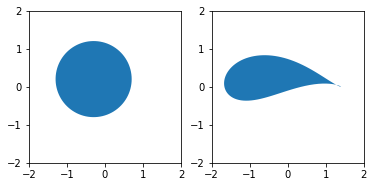

In [108]:
def joukowski(z, c = 0.5):
    return z + c**2 / z

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# offset of circle
z0 = -0.3 + 0.2j
circ = circle(radius = 1, centre = z0)
ax.fill(circ.real, circ.imag)

ax = fig.add_subplot(1, 2, 2)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')

# parameter c; the close it gets to 1, the flatter the transformation
circ = joukowski(circ, c = 0.7)
ax.fill(circ.real, circ.imag)

## The Joukowski Aerofoil

Let's use these ideas to create a nice plot of the streamlines and pressure field around an aerofoil shape.  We know the complex potential around a circular cylinder offset from the origin by an amount $\lambda$ is
$$
w(z) = U\left[ (z+\lambda) e^{-i\alpha} + \frac{(a+\lambda)^2}{z+\lambda} e^{i\alpha} \right] - \frac{i\Gamma}{2\pi} \ln (z+\lambda).
$$
To find the pressure, we'll need the derivative of this as well:
$$
\frac{dw}{dz} = U e^{-i\alpha} - Ue^{i\alpha} (a+\lambda)^2 / (z+\lambda)^2 - i\Gamma / 2\pi(z+\lambda).
$$
While we're tkaing derivatives, we'll need one of the Joulowski transformation, too, since the flow in the $Z$ plane, $[U, V]$, is given by
$$
U - iV = \frac{dw/dz}{f'(z)},
$$
where
$$
f'(z) = 1 - \frac{a^2}{z^2}.
$$

In [89]:
def flow_around_shifted_circle(z, a = 1.0, U = 1.0, alpha = 0, Gamma = 0, lam = 0.0):
    return U * ((z+lam)*np.exp(-1j*alpha) + (a+lam)**2/(z+lam) * np.exp(1j*alpha)) - 1j * Gamma / 2.0 / np.pi * np.log(z+lam)

def vel_around_shifted_circle(z, a = 1.0, U = 1.0, alpha = 0, Gamma = 0, lam = 0.0):
    return U * ( np.exp(-1j * alpha) - ((a+lam)/(z+lam))**2 * np.exp(1j*alpha) ) - 1j*Gamma / (2.0 * np.pi * (z+lam))

def joulowski_deriv(z, c = 0.7):
    return 1 - c**2/z**2

Let's test our functions by plotting the flow around the circle -- we won't bring in the Joulowski transformation just yet.  We'll start with the meshgrid for the complex plane, but we need to create it using polar coordinates.  This is because we don't want any grid points within the circle.  It's fine for this, but when we apply the Joukowski transformation those points get mapped outside and are unphysical.

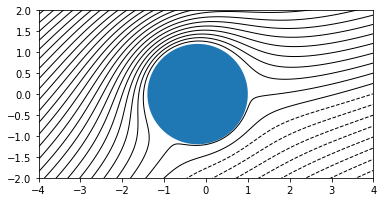

In [142]:
# various parameters
a = 1.0
lam = 0.2
Gamma = -4.0*np.pi*(a+lam)*np.sin(np.pi/6)
alpha = np.pi/6

# create the meshgrid
radii = np.linspace(a+lam, 5.0, 200)
angles = np.linspace(0, 2*np.pi, 200)
radii, angles = np.meshgrid(radii, angles)
zr = -lam + radii * np.exp(1j * angles)

# calculate the stream function
psi = flow_around_shifted_circle(zr, a = a, lam=lam, alpha = alpha, Gamma = Gamma).imag

# plot
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-2, 2)

ax.contour(zr.real, zr.imag, psi, colors='black', levels=50, linewidths=1)

# draw the circle, too
circ = circle(a+lam, -lam)
ax.fill(circ.real, circ.imag)

To also find the pressure, we can use Bernoulli's theorem,
$$
\frac{p_\infty}{\rho} + \frac{1}{2} U^2 = \frac{p(x, y)}{\rho} + \frac{1}{2} \vec{u}^2,
$$
and solve for the pressure $p$:
$$
p(x, y) = \text{constant} - \frac{1}{2} \rho \mathbf{u}^2
$$
where $\mathbf{u}^2 = u^2 + v^2$.  We find the velocities from the derivative of the complex potential.

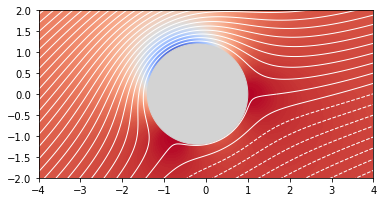

In [135]:
rho = 1.0

dw = vel_around_shifted_circle(zr, a, lam=lam, alpha = alpha, Gamma = Gamma)
u = dw.real
v = -dw.imag

p = -0.5 * rho * (u**2 + v**2)

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-2, 2)

ax.contourf(zr.real, zr.imag, p, cmap = "coolwarm", levels=300)
ax.contour(zr.real, zr.imag, psi, colors='white', levels=50, linewidths=1)
circ = circle(a+lam, -lam)
ax.fill(circ.real, circ.imag, color="lightgrey")

Now let's draw the same thing in the $Z$ plane under the Joukowski transformation.  It's actually easy to do so:  just transform the coordinates as we did with the circle above.  The only thing we have to be careful about is the velocity calculation -- it has to change to include $f'(z)$.

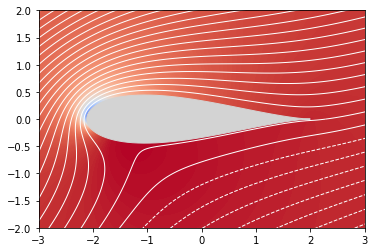

In [140]:
zjt = joukowski(zr, c = a)

dw = vel_around_shifted_circle(zr, a, lam=lam, alpha = alpha, Gamma = Gamma) / joulowski_deriv(zr, c=0.99)
u = dw.real
v = -dw.imag

p = -0.5 * rho * (u**2 + v**2)

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)

ax.contourf(zjt.real, zjt.imag, p, cmap = "coolwarm", levels=300)
ax.contour(zjt.real, zjt.imag, psi, colors='white', levels=50, linewidths=1)
circ = joukowski(circle(a+lam, -lam), c = a)
ax.fill(circ.real, circ.imag, color="lightgrey")